In [2]:
!pip install librosa

     |████████████████████████████████| 1.6 MB 1.2 MB/s eta 0:00:01
  Using cached scipy-1.4.1-cp36-cp36m-manylinux1_x86_64.whl (26.1 MB)
  Using cached scikit_learn-0.22.2.post1-cp36-cp36m-manylinux1_x86_64.whl (7.1 MB)
  Using cached joblib-0.14.1-py2.py3-none-any.whl (294 kB)
     |████████████████████████████████| 323 kB 1.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.5 MB 558 kB/s eta 0:00:01
     |████████████████████████████████| 20.2 MB 671 kB/s eta 0:00:01
  Using cached cffi-1.14.0-cp36-cp36m-manylinux1_x86_64.whl (399 kB)
  Using cached pycparser-2.20-py2.py3-none-any.whl (112 kB)
  Created wheel for librosa: filename=librosa-0.7.2-py3-none-any.whl size=1612883 sha256=d329f9a55bcde185ffdd9e50b53d033a5e0b617537f8221ed824ee6fc3e3aa6b
  Stored in directory: /home/adam/.cache/pip/wheels/cb/1d/15/a479fa740849128d481333d2f354f97691be3e2c82480a3e00
  Created wheel for audioread: filename=audioread-2.1.8-py3-none-any.whl size=23091 sha256=5daea21b4db9be1b38b2a5a4390f5

In [4]:
%pip install matplotlib

     |████████████████████████████████| 12.4 MB 769 kB/s eta 0:00:01
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.1.0-cp36-cp36m-manylinux1_x86_64.whl (90 kB)
  Using cached pyparsing-2.4.6-py2.py3-none-any.whl (67 kB)
Note: you may need to restart the kernel to use updated packages.


In [5]:
%matplotlib inline

In [10]:
import librosa
import librosa.display
from matplotlib.pylab import plt

In [65]:
y1, sr1 = librosa.load('whale.wav')

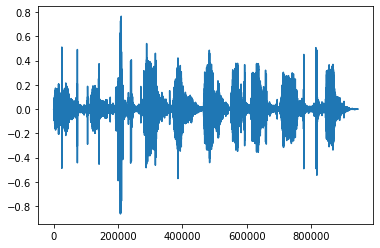

In [66]:
plt.plot(range(len(y1)), y1)

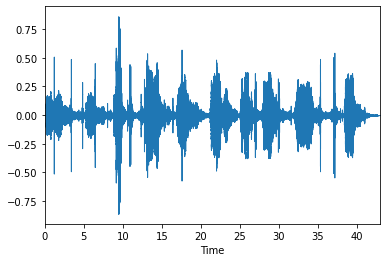

In [73]:
librosa.display.waveplot(y1, sr1)

In [67]:
y2, sr2 = librosa.load('whale.wav', sr=1000)

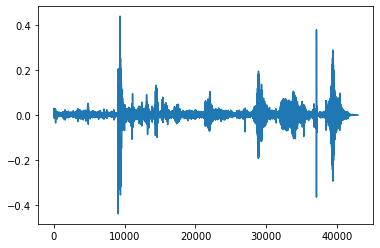

In [68]:
plt.plot(range(len(y2)), y2)

In [69]:
y1_trim, non_silent = librosa.effects.trim(y1)
non_silent

array([   512, 942080])

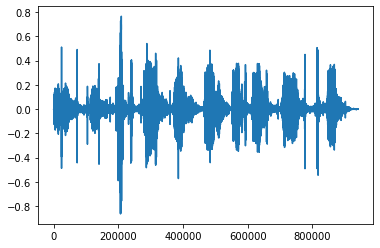

In [70]:
plt.plot(range(len(y1_trim[non_silent[0]: non_silent[1]])), y1_trim[non_silent[0]:non_silent[1]])

In [33]:
import IPython.display as ipd

In [72]:
ipd.Audio(data=y2, rate=sr2)

In [80]:
librosa.stft??

Signature:
librosa.stft(
    y,
    n_fft=2048,
    hop_length=None,
    win_length=None,
    window='hann',
    center=True,
    dtype=<class 'numpy.complex64'>,
    pad_mode='reflect',
)
Source:   
@cache(level=20)
def stft(y, n_fft=2048, hop_length=None, win_length=None, window='hann',
         center=True, dtype=np.complex64, pad_mode='reflect'):
    """Short-time Fourier transform (STFT). [1]_ (chapter 2)

    The STFT represents a signal in the time-frequency domain by
    computing discrete Fourier transforms (DFT) over short overlapping
    windows.

    This function returns a complex-valued matrix D such that

    - `np.abs(D[f, t])` is the magnitude of frequency bin `f`
      at frame `t`, and

    - `np.angle(D[f, t])` is the phase of frequency bin `f`
      at frame `t`.

    The integers `t` and `f` can be converted to physical units by means
    of the utility functions `frames_to_sample` and `fft_frequencies`.

    .. [1] M. Müller. "Fundamentals of Music Processing." S

In [75]:
import numpy as np

In [165]:
n_fft = 2048
hop_length = 512

D = np.abs(librosa.stft(y1_trim, n_fft=n_fft,
                        hop_length=hop_length))

In [166]:
D.shape

(1025, 1840)

In [167]:
D.shape[1]*512, y1_trim.shape[0]

(942080, 941568)

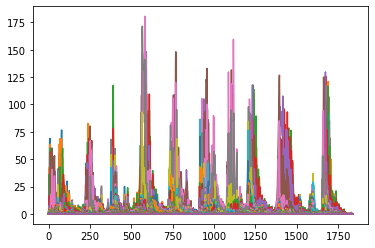

In [168]:
#y amplitude, color freq, x time
x = plt.plot(D.T)

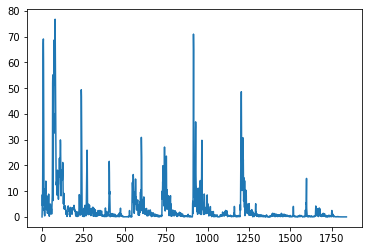

In [169]:
# Evolution of one frequency amplitude during time (step of hop_len)
x = plt.plot(D[50])

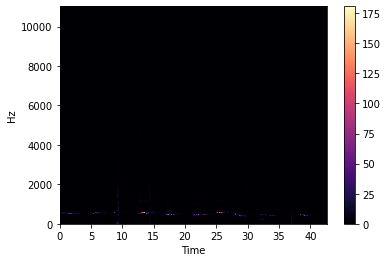

In [170]:
librosa.display.specshow(D, sr=sr1, x_axis='time', y_axis='linear');
plt.colorbar();

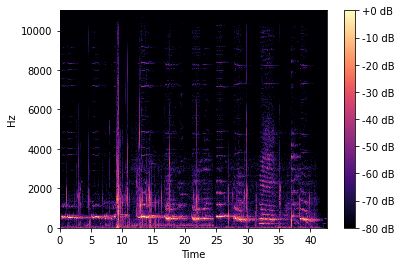

In [171]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr1, hop_length=hop_length, 
                         x_axis='time', y_axis='linear');
plt.colorbar(format='%+2.0f dB');

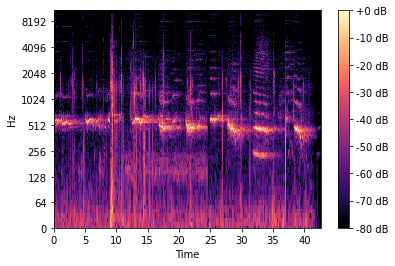

In [172]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr1, hop_length=hop_length, 
                         x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

In [173]:
# mel converts each time window freq spectrum to 128 channels
n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

In [174]:
mel.shape

(128, 1025)

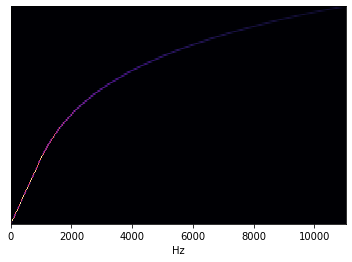

In [176]:
librosa.display.specshow(mel, sr=sr1, hop_length=hop_length, x_axis='linear'); # y male scale

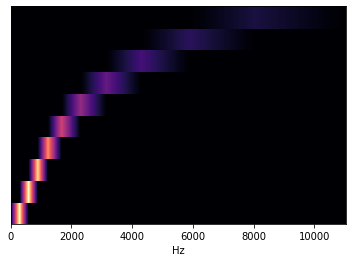

In [178]:
mel_10 = librosa.filters.mel(sr=sr1, n_fft=n_fft, n_mels=10)
librosa.display.specshow(mel_10, sr=sr1, hop_length=hop_length, x_axis='linear');

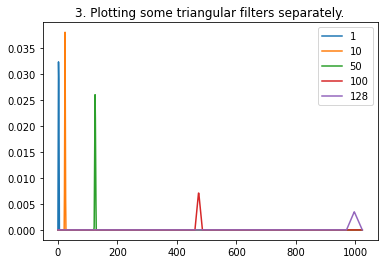

In [179]:
idxs_to_plot = [0, 9, 49, 99, 127]
for i in idxs_to_plot:
    plt.plot(mel[i]);
plt.legend(labels=['{}'.format(i+1) for i in idxs_to_plot]);
plt.title('3. Plotting some triangular filters separately.');

Text(0.5, 1.0, 'One sampled window for example, before and after converting to mel.')

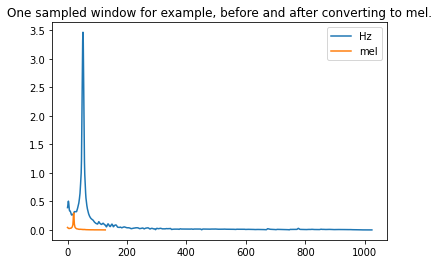

In [180]:
plt.plot(D[:, 1]);
plt.plot(mel.dot(D[:, 1]));
plt.legend(labels=['Hz', 'mel']);
plt.title('One sampled window for example, before and after converting to mel.')

In [181]:
mel.shape, D[:, 1].shape, mel.dot(D[:, 1]).shape

((128, 1025), (1025,), (128,))

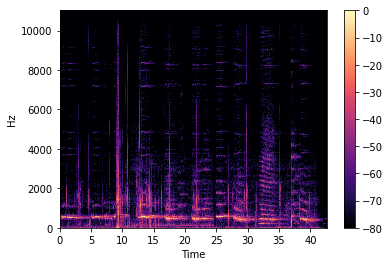

In [182]:
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr1, x_axis='time', y_axis='linear');
plt.colorbar();

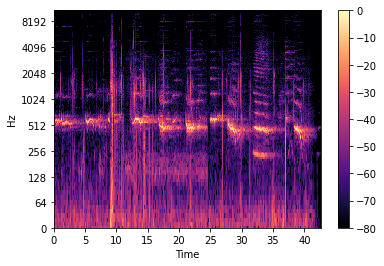

In [183]:
librosa.display.specshow(librosa.amplitude_to_db(D, ref=np.max), sr=sr1, x_axis='time', y_axis='log');
plt.colorbar();

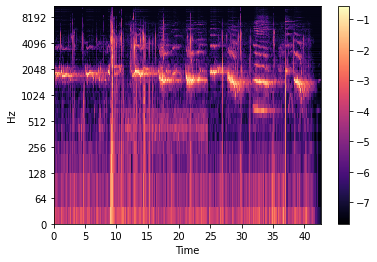

In [197]:
librosa.display.specshow(mel.dot(librosa.amplitude_to_db(D, ref=np.max)), sr=sr1, x_axis='time', y_axis='log');
plt.colorbar();

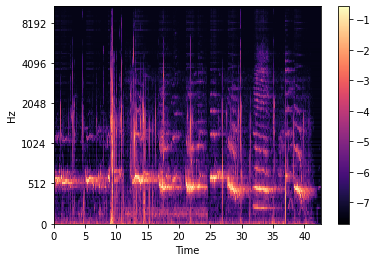

In [198]:
librosa.display.specshow(mel.dot(librosa.amplitude_to_db(D, ref=np.max)), sr=sr1, x_axis='time', y_axis='mel');
plt.colorbar();

In [ ]:
# Similars

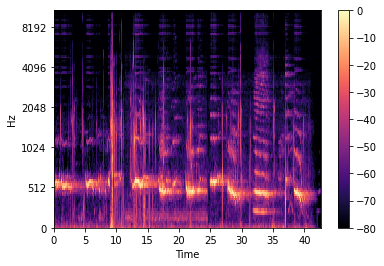

In [195]:
librosa.display.specshow(librosa.power_to_db(mel.dot(np.power(D,2)), ref=np.max), sr=sr1, x_axis='time', y_axis='mel');
plt.colorbar();

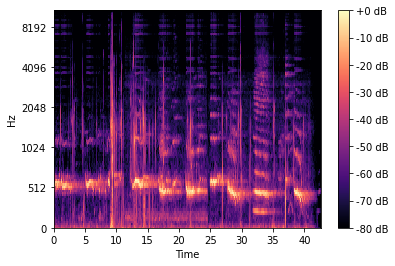

In [155]:
S = librosa.feature.melspectrogram(y1_trim, sr=sr1, n_fft=n_fft, 
                                   hop_length=hop_length, 
                                   n_mels=n_mels)
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

In [193]:
# Sanity check that indeed we understood the underlying pipeline
S = librosa.feature.melspectrogram(y1_trim, sr=sr1, n_fft=n_fft, 
                                   hop_length=hop_length, 
                                   n_mels=n_mels)
fft_windows = librosa.stft(y1_trim, n_fft=n_fft, 
                           hop_length=hop_length)
magnitude = np.abs(fft_windows)**2
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
assert (mel.dot(magnitude) == S).all()
mel.dot(magnitude), S

(array([[4.40876155e-12, 2.06867661e-02, 3.93704444e-01, ...,
         6.85082853e-07, 3.00999403e-07, 5.11256701e-07],
        [3.52414734e-12, 1.72161125e-02, 7.76541159e-02, ...,
         1.44875719e-06, 5.35980973e-07, 6.65708342e-07],
        [3.09560775e-12, 1.09105185e-02, 5.02999052e-02, ...,
         2.52340215e-07, 2.67229240e-07, 4.73322586e-07],
        ...,
        [2.92945084e-13, 2.85428746e-06, 1.21160410e-05, ...,
         1.54779300e-09, 1.50708035e-09, 1.81042747e-09],
        [5.22668063e-13, 8.84864562e-07, 3.88084163e-06, ...,
         5.83605719e-10, 5.73544046e-10, 6.41845410e-10],
        [1.12430220e-13, 8.43658370e-08, 4.20737166e-07, ...,
         6.60917571e-11, 8.42720338e-11, 1.06664226e-10]], dtype=float32),
 array([[4.40876155e-12, 2.06867661e-02, 3.93704444e-01, ...,
         6.85082853e-07, 3.00999403e-07, 5.11256701e-07],
        [3.52414734e-12, 1.72161125e-02, 7.76541159e-02, ...,
         1.44875719e-06, 5.35980973e-07, 6.65708342e-07],
        [3